In [29]:
import pandas as pd
import re
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt

In [30]:
RE_SPACE = re.compile(r'[\s]+')

In [31]:
path = "../test_data/test1"

In [32]:
df = pd.read_csv(path+"/test1_stats_history.csv")

In [33]:
df.columns

Index(['Timestamp', 'User Count', 'Type', 'Name', 'Requests/s', 'Failures/s',
       '50%', '66%', '75%', '80%', '90%', '95%', '98%', '99%', '99.9%',
       '99.99%', '100%', 'Total Request Count', 'Total Failure Count',
       'Total Median Response Time', 'Total Average Response Time',
       'Total Min Response Time', 'Total Max Response Time',
       'Total Average Content Size'],
      dtype='object')

In [34]:
columns = ['Timestamp', 'Name', 'Requests/s', 'Total Average Response Time']

In [35]:
df = df[columns]

In [36]:
df

,Timestamp,Name,Requests/s,Total Average Response Time
0,1638407231,Aggregated,0.0,0.000000
1,1638407232,Aggregated,0.0,0.000000
2,1638407233,Aggregated,0.0,0.000000
3,1638407234,Aggregated,0.0,0.000000
4,1638407235,Aggregated,0.0,0.000000
...,...,...,...,...
1491,1638407612,Aggregated,2.9,45.638680
1492,1638407613,/actions/fib_c/invoke,1.1,51.302963
1493,1638407613,/actions/fib_cn/invoke,1.1,43.629805
1494,1638407613,/ping,0.7,38.391510


In [37]:
df = df[df['Total Average Response Time'] >0]
df = df[df['Name'] != "Aggregated"]
df['Action'] = df.apply(lambda row: row.x + row.y, axis=1)

In [38]:
df

,Timestamp,Name,Requests/s,Total Average Response Time
8,1638407239,/actions/fib_cn/invoke,0.0,75.404300
10,1638407240,/actions/fib_c/invoke,0.0,37.341400
11,1638407240,/actions/fib_cn/invoke,0.0,64.467800
13,1638407241,/actions/fib_c/invoke,0.0,56.055450
14,1638407241,/actions/fib_cn/invoke,0.0,48.049750
...,...,...,...,...
1489,1638407612,/actions/fib_cn/invoke,1.1,43.629805
1490,1638407612,/ping,0.7,38.391510
1492,1638407613,/actions/fib_c/invoke,1.1,51.302963
1493,1638407613,/actions/fib_cn/invoke,1.1,43.629805


In [39]:
ts = int('1284101485')
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

2010-09-10 06:51:25


In [41]:
df1 = df

Name
/actions/fib_c/invoke     AxesSubplot(0.125,0.125;0.775x0.755)
/actions/fib_cn/invoke    AxesSubplot(0.125,0.125;0.775x0.755)
/ping                     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Total Average Response Time, dtype: object

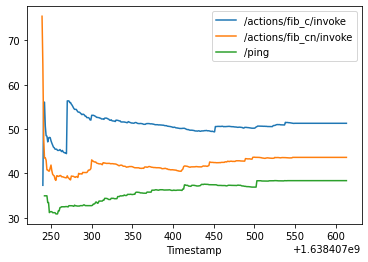

In [42]:
df1.set_index('Timestamp', inplace=True)
df1.groupby('Name')['Total Average Response Time'].plot(legend=True)

In [43]:
groupd = df1.groupby('Name')

In [45]:
for name, grp in groupd:
    print(grp)
    break

                             Name  Requests/s  Total Average Response Time
Timestamp                                                                 
1638407240  /actions/fib_c/invoke    0.000000                    37.341400
1638407241  /actions/fib_c/invoke    0.000000                    56.055450
1638407242  /actions/fib_c/invoke    0.000000                    56.055450
1638407243  /actions/fib_c/invoke    0.500000                    50.660160
1638407244  /actions/fib_c/invoke    0.666667                    48.515029
...                           ...         ...                          ...
1638407609  /actions/fib_c/invoke    1.100000                    51.302963
1638407610  /actions/fib_c/invoke    1.100000                    51.302963
1638407611  /actions/fib_c/invoke    1.100000                    51.302963
1638407612  /actions/fib_c/invoke    1.100000                    51.302963
1638407613  /actions/fib_c/invoke    1.100000                    51.302963

[372 rows x 3 columns]


In [48]:
diff = groupd.get_group('/ping')['Total Average Response Time']

In [51]:
diff

Timestamp
1638407242    34.97510
1638407243    34.97510
1638407244    34.97510
1638407245    34.97510
1638407246    33.45360
                ...   
1638407609    38.39151
1638407610    38.39151
1638407611    38.39151
1638407612    38.39151
1638407613    38.39151
Name: Total Average Response Time, Length: 370, dtype: float64

In [55]:
d_native = groupd.get_group('/actions/fib_cn/invoke')
d_c = groupd.get_group('/actions/fib_c/invoke')

In [58]:
d_native['Total Average Response Time'] = d_native['Total Average Response Time']-diff

<ipython-input-58-c909e66d7d5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_native['Total Average Response Time'] = d_native['Total Average Response Time']-diff


In [59]:
d_native

,Name,Requests/s,Total Average Response Time
Timestamp,,,
1638407239,/actions/fib_cn/invoke,0.0,NaN
1638407240,/actions/fib_cn/invoke,0.0,NaN
1638407241,/actions/fib_cn/invoke,0.0,NaN
1638407242,/actions/fib_cn/invoke,1.0,8.545750
1638407243,/actions/fib_cn/invoke,1.0,8.545750
...,...,...,...
1638407609,/actions/fib_cn/invoke,1.1,5.238296
1638407610,/actions/fib_cn/invoke,1.1,5.238296
1638407611,/actions/fib_cn/invoke,1.1,5.238296


In [60]:
d_c['Total Average Response Time'] = d_c['Total Average Response Time']-diff

<ipython-input-60-9d17ce03fff1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_c['Total Average Response Time'] = d_c['Total Average Response Time']-diff


In [61]:
d_c

,Name,Requests/s,Total Average Response Time
Timestamp,,,
1638407240,/actions/fib_c/invoke,0.000000,NaN
1638407241,/actions/fib_c/invoke,0.000000,NaN
1638407242,/actions/fib_c/invoke,0.000000,21.080350
1638407243,/actions/fib_c/invoke,0.500000,15.685060
1638407244,/actions/fib_c/invoke,0.666667,13.539929
...,...,...,...
1638407609,/actions/fib_c/invoke,1.100000,12.911453
1638407610,/actions/fib_c/invoke,1.100000,12.911453
1638407611,/actions/fib_c/invoke,1.100000,12.911453


In [62]:
d_native.dropna(inplace=True)
d_c.dropna(inplace=True)

<ipython-input-62-a2729a1a388b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_native.dropna(inplace=True)
<ipython-input-62-a2729a1a388b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_c.dropna(inplace=True)


<AxesSubplot:xlabel='Timestamp'>

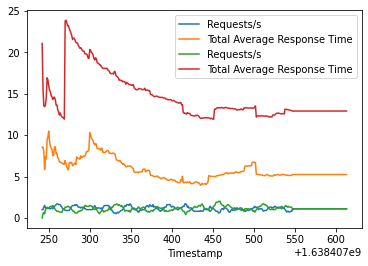

In [64]:
ax = d_native.plot(legend=True)
d_c.plot(ax=ax)

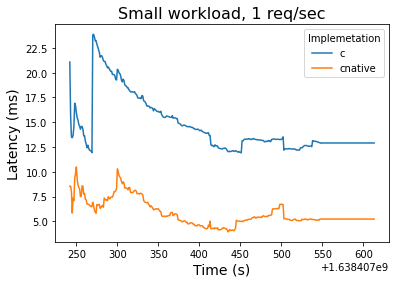

In [66]:
plt.plot(d_c['Total Average Response Time'], label='c')
plt.plot(d_native['Total Average Response Time'], label='cnative')

plt.legend(title='Implemetation')

#add axes labels and a title
plt.ylabel('Latency (ms)', fontsize=14)
plt.xlabel('Time (s)', fontsize=14)
plt.title('Small workload, 1 req/sec', fontsize=16)
#display plot
plt.show()